In [1]:
import numpy as np
import pandas as pd 
import nltk

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd 
from autocorrect import Speller

import re


In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd 
from autocorrect import Speller



In [4]:
df_tweets=pd.read_csv('/Users/vallirajasekar/Downloads/twitter-airline-sentiment.csv')

In [5]:
airline_tweets=df_tweets[['airline_sentiment','text']]

In [6]:
airline_tweets.shape

(14640, 2)

In [7]:
airline_tweets.rename(columns={'airline_sentiment':'Sentiment','text':'Messages'},inplace=True)

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_10959/449009723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_tweets.rename(columns={'airline_sentiment':'Sentiment','text':'Messages'},inplace=True)


In [8]:
airline_tweets.head()

,Sentiment,Messages
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [9]:
airline_tweets['Sentiment'].value_counts()

Sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

## Lets Visualize the  Words based on the Sentiment 

In [10]:
from wordcloud import WordCloud,wordcloud

In [11]:
import matplotlib.pyplot as plt

## Based on Negative Sentiment 

In [12]:
negative_words = ' '.join(list(airline_tweets[airline_tweets['Sentiment'] == 'negative']['Messages']))


In [13]:
Neg_senti_wc=WordCloud(width=500,height=500,contour_color='Red').generate(negative_words)

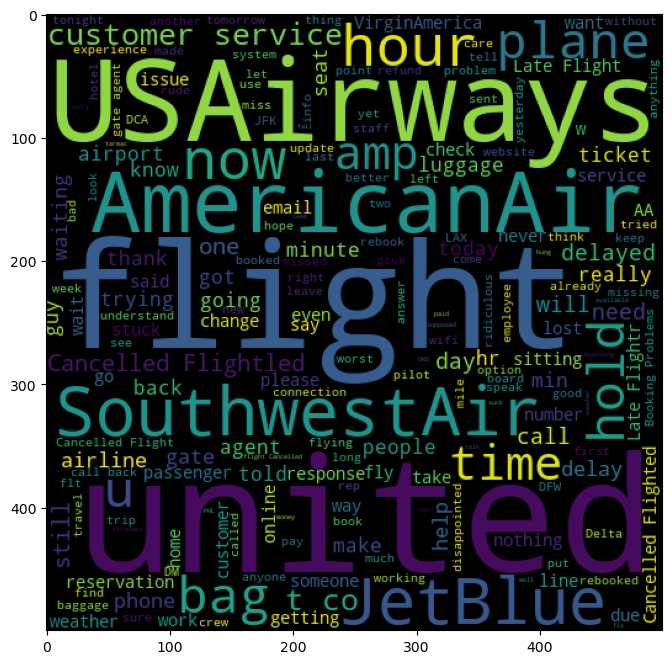

In [14]:
plt.figure(figsize=(10,8))
plt.imshow(Neg_senti_wc)
plt.show()

## Based on Positive Sentiment 

In [15]:
positive_words = ' '.join(list(airline_tweets[airline_tweets['Sentiment'] == 'positive']['Messages']))


In [16]:
Pos_senti_wc=WordCloud(width=500,height=500,contour_color='Red').generate(positive_words)

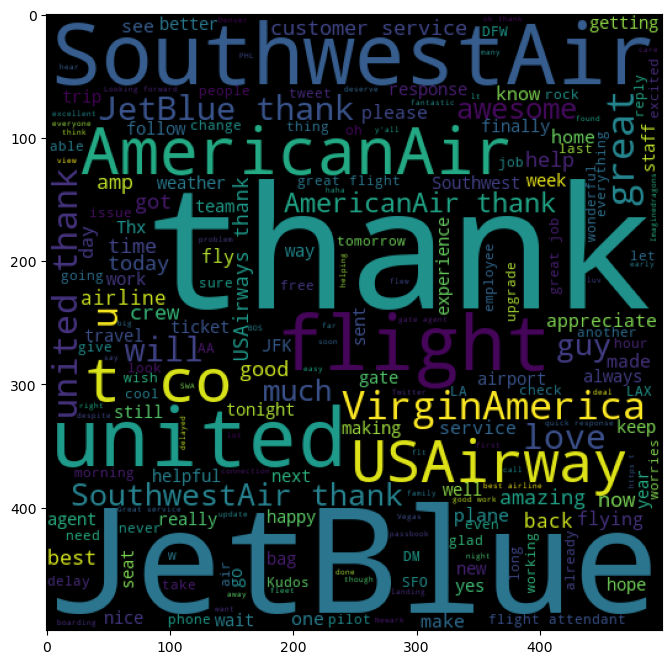

In [17]:
plt.figure(figsize=(10,8))
plt.imshow(Pos_senti_wc)
plt.show()

## Based on Neutral Statement 

In [18]:
neutral_words = ' '.join(list(airline_tweets[airline_tweets['Sentiment'] == 'neutral']['Messages']))


In [19]:
neu_senti_wc=WordCloud(width=500,height=500,contour_color='Red').generate(neutral_words)

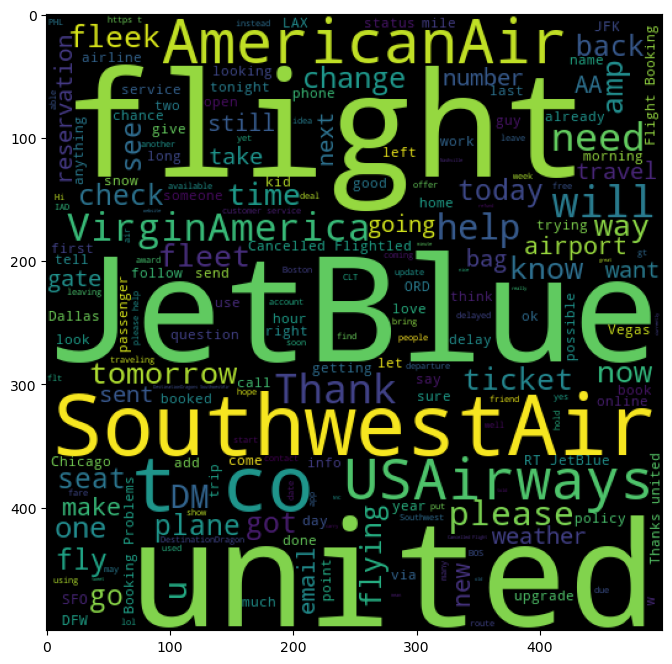

In [20]:
plt.figure(figsize=(10,8))
plt.imshow(neu_senti_wc)
plt.show()

## Preprocessing in NLP Data for above Data¶

In [21]:
airline_tweets

,Sentiment,Messages
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [22]:
spell=Speller()

In [23]:
stemmer=PorterStemmer()

data=[]
for i in range(airline_tweets.shape[0]):
    lines=airline_tweets.iloc[i,1]
    lines=re.sub('[^a-zA-Z]',' ',lines)
    lines=lines.lower()
    lines=word_tokenize(lines)
    
process_words=[]
for i in lines:
    if i not in set(stopwords.words('english')):
        process_words.append(stemmer.stem(i))
        
final_line=' '.join(process_words)
data.append(final_line)
    

In [24]:
data = []

for i in range(airline_tweets.shape[0]):
    lines = airline_tweets.iloc[i, 1]
    lines = re.sub('[^a-zA-Z]', ' ', lines)
    lines = lines.lower()
    lines = word_tokenize(lines)
    
    process_words = []
    for word in lines:  # Use a different variable name here to avoid conflict with 'i'
        if word not in set(stopwords.words('english')):
            process_words.append(stemmer.stem(word))
    
    final_line = ' '.join(process_words)
    data.append(final_line)


In [25]:
pd.DataFrame(data)

,0
0,virginamerica dhepburn said
1,virginamerica plu ad commerci experi tacki
2,virginamerica today must mean need take anoth ...
3,virginamerica realli aggress blast obnoxi ente...
4,virginamerica realli big bad thing
...,...
14635,americanair thank got differ flight chicago
14636,americanair leav minut late flight warn commun...
14637,americanair pleas bring american airlin blackb...
14638,americanair money chang flight answer phone su...


In [26]:
airline_tweets

,Sentiment,Messages
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [27]:
airline_tweets['Sentiment']=airline_tweets['Sentiment'].map({'negative':0,'neutral':5,'positive':10})

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_10959/3009464945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_tweets['Sentiment']=airline_tweets['Sentiment'].map({'negative':0,'neutral':5,'positive':10})


In [28]:
airline_tweets

,Sentiment,Messages
0,5,@VirginAmerica What @dhepburn said.
1,10,@VirginAmerica plus you've added commercials t...
2,5,@VirginAmerica I didn't today... Must mean I n...
3,0,@VirginAmerica it's really aggressive to blast...
4,0,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,10,@AmericanAir thank you we got on a different f...
14636,0,@AmericanAir leaving over 20 minutes Late Flig...
14637,5,@AmericanAir Please bring American Airlines to...
14638,0,"@AmericanAir you have my money, you change my ..."


In [30]:
y=airline_tweets['Sentiment']

In [31]:
y

0         5
1        10
2         5
3         0
4         0
         ..
14635    10
14636     0
14637     5
14638     0
14639     5
Name: Sentiment, Length: 14640, dtype: int64

## Splitting the Data into Training and Texting¶

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.25,)

## Vectorizing using Bag of Words

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
matrix=CountVectorizer()

In [36]:
X_train_vect=matrix.fit_transform(X_train).toarray()

In [37]:
X_test_vect=matrix.transform(X_test).toarray()

## Lets Train Our Model -- Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [39]:
model=MultinomialNB()

In [40]:
model.fit(X_train_vect,y_train)

MultinomialNB()

In [41]:
model.class_count_

array([6889., 2297., 1794.])

In [42]:
model.score(X_train_vect,y_train)

0.8357012750455374

In [43]:
model.score(X_test_vect,y_test)

0.7513661202185792

In [45]:
y_pred=model.predict(X_test_vect)

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [47]:
accuracy_score(y_test,y_pred)

0.7513661202185792

In [49]:
y_pred

array([0, 0, 0, ..., 5, 5, 0])

In [50]:
y_test

5835      0
1332      0
8473      5
14190     5
5370     10
         ..
9380      0
14394     0
10792     5
5642      5
9457      0
Name: Sentiment, Length: 3660, dtype: int64

In [51]:
confusion_matrix(y_test,y_pred)

array([[2158,   97,   34],
       [ 449,  290,   63],
       [ 200,   67,  302]])